# Traveling Salesman Problem - Optimization Algorithms

This notebook demonstrates the application of optimization algorithms to solve the **Traveling Salesman Problem (TSP)** for Tunisian cities. The algorithms used are:
- **Flower Pollination Algorithm (FPA)**
- **Simulated Annealing (SA)**
- **Genetic Algorithm (GA)**

The notebook replicates the functionality of the Streamlit app, including running the algorithms, visualizing the optimization process, and comparing results.

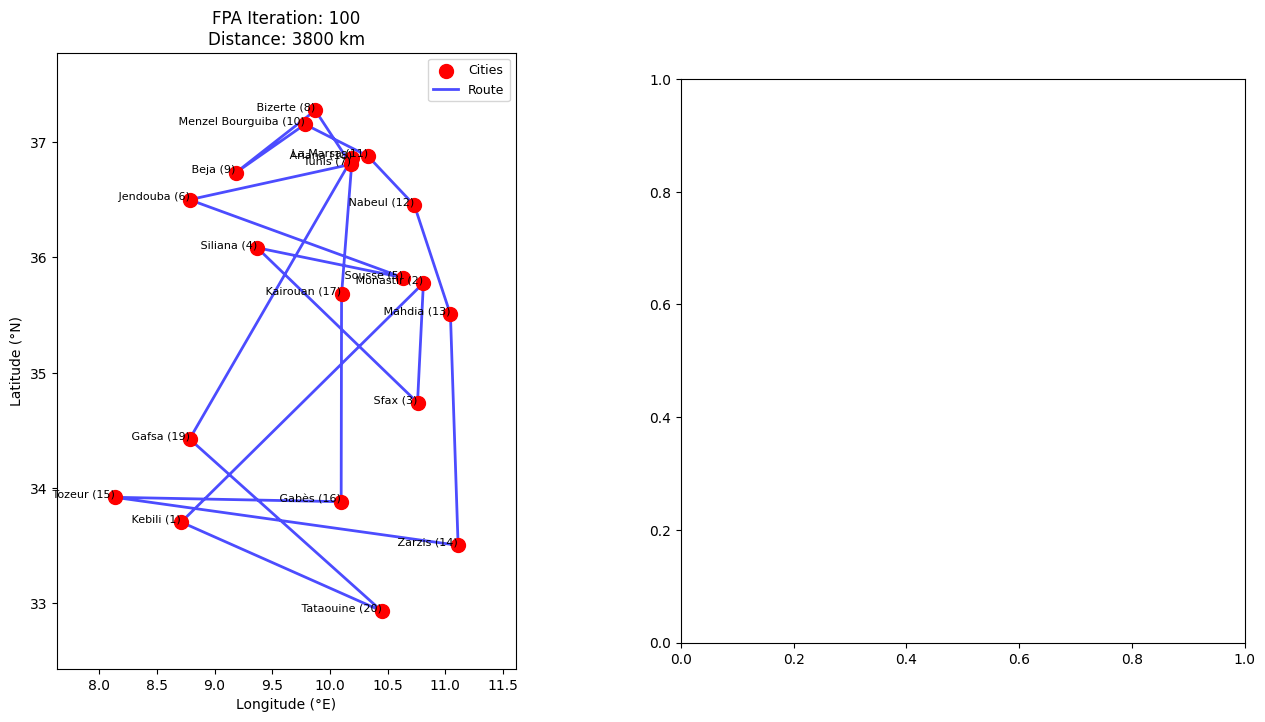

In [2]:
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import folium
import time
from folium.plugins import AntPath
from algorithms import CityData, FlowerPollinationAlgorithm, SimulatedAnnealing, GeneticAlgorithm

# Load City Data
Load the city data for Tunisian cities, including their coordinates and distance matrix.

In [3]:
# Load city data
city_data = CityData()

# Helper Functions
Define helper functions for plotting routes using Matplotlib and Folium.

In [4]:
# Helper function to plot routes using Matplotlib
def plot_route(city_data, route, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    route = list(route) + [route[0]]  # Complete the loop
    ax.scatter(city_data.cities[:, 0], city_data.cities[:, 1], c='red', s=100, zorder=5, label='Cities')
    for i, (x, y) in enumerate(city_data.cities):
        order = route.index(i) + 1 if i in route else None
        ax.text(x, y, f' {city_data.city_names[i]} ({order})', fontsize=8, ha='right', zorder=10)
    ax.plot(city_data.cities[route, 0], city_data.cities[route, 1], 'b-', lw=2, alpha=0.7, label='Route')
    ax.set_title(title, fontsize=12)
    ax.set_xlabel("Longitude (°E)")
    ax.set_ylabel("Latitude (°N)")
    ax.legend()
    plt.show()
    plt.close(fig)

# Helper function to create a folium map with animated route and arrows
def create_map(city_data, route):
    m = folium.Map(location=[city_data.cities[:, 1].mean(), city_data.cities[:, 0].mean()], zoom_start=7)

    # Ensure route is a list for .index() support
    route_list = list(route)

    # Add city markers with order numbers
    for i, (lon, lat) in enumerate(city_data.cities):
        order = route_list.index(i) + 1 if i in route_list else None
        folium.Marker(
            [lat, lon], 
            popup=f"{city_data.city_names[i]} ({order})" if order else city_data.city_names[i]
        ).add_to(m)

    # Prepare the route coordinates
    route_coords = [[city_data.cities[city, 1], city_data.cities[city, 0]] for city in route_list]
    route_coords.append(route_coords[0])  # Close the loop by returning to the starting city

    # Add animated route using AntPath
    AntPath(
        locations=route_coords,
        color="blue",
        pulse_color="white",
        weight=6,
        delay=300,  # ~1 second per segment
        dash_array=[60, 20],
    ).add_to(m)

    # Add arrows to indicate direction
    for i in range(len(route_coords) - 1):
        start = route_coords[i]
        end = route_coords[i + 1]
        midpoint = [(start[0] + end[0]) / 2, (start[1] + end[1]) / 2]  # Calculate midpoint

        # Calculate the angle of the arrowhead
        angle = np.arctan2(end[0] - start[0], end[1] - start[1]) * (180 / np.pi)

        folium.PolyLine(
            [start, end],
            color="blue",
            weight=2,
            opacity=0.8
        ).add_to(m)

        # Add an arrowhead marker at the midpoint with the correct rotation
        folium.RegularPolygonMarker(
            location=midpoint,
            fill_color="blue",
            number_of_sides=3,
            radius=10,
            rotation=angle + 90  # Adjust rotation to align with the line
        ).add_to(m)

    return m

# Run Algorithms
Run the Flower Pollination Algorithm (FPA), Simulated Annealing (SA), and Genetic Algorithm (GA) to solve the TSP.

In [5]:
# Solve using Flower Pollination Algorithm and record execution time
start_fpa = time.time()
fpa = FlowerPollinationAlgorithm(city_data)
fpa.optimize()
fpa_exec_time = time.time() - start_fpa

# Solve using Simulated Annealing and record execution time
start_sa = time.time()
sa = SimulatedAnnealing(city_data)
sa.optimize()
sa_exec_time = time.time() - start_sa

# Solve using Genetic Algorithm and record execution time
start_ga = time.time()
ga = GeneticAlgorithm(city_data)
ga.optimize()
ga_exec_time = time.time() - start_ga

# Visualize Results
Visualize the optimization process and final routes for each algorithm.

Flower Pollination Algorithm (FPA):


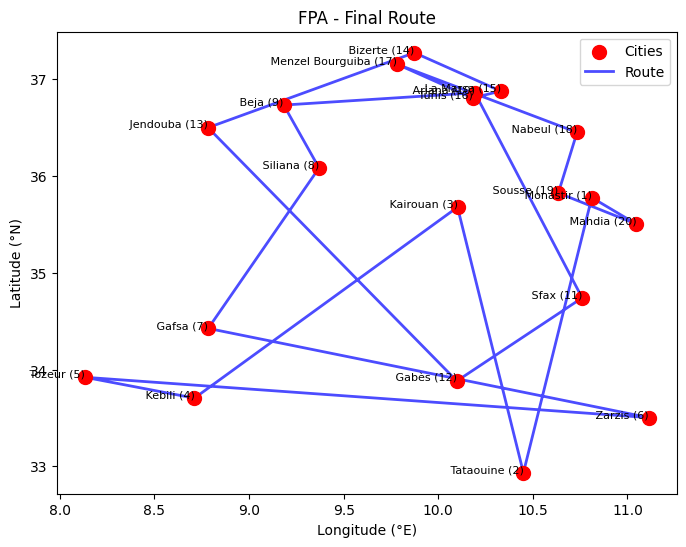

In [6]:
# Visualize FPA results
print("Flower Pollination Algorithm (FPA):")
plot_route(city_data, fpa.best_permutation, "FPA - Final Route")
fpa_map = create_map(city_data, fpa.best_permutation)
fpa_map

Simulated Annealing (SA):


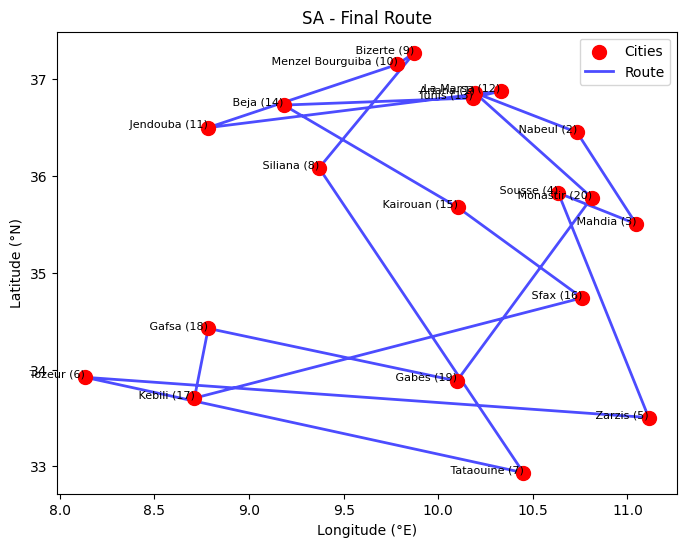

In [7]:
# Visualize SA results
print("Simulated Annealing (SA):")
plot_route(city_data, sa.best_solution, "SA - Final Route")
sa_map = create_map(city_data, sa.best_solution)
sa_map

Genetic Algorithm (GA):


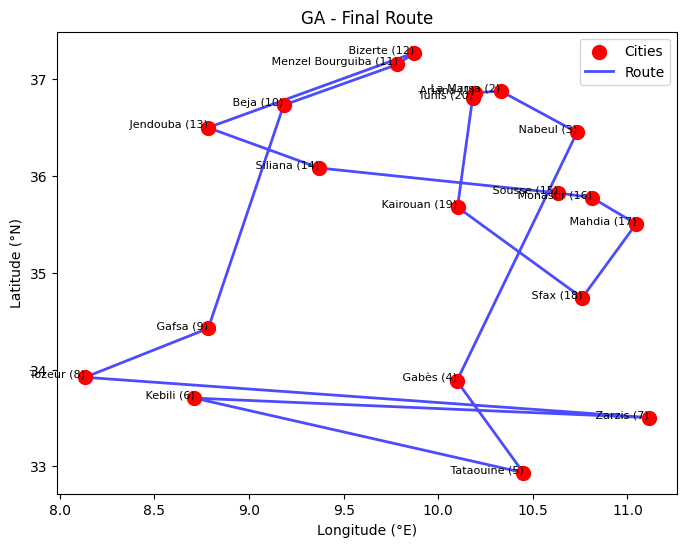

In [8]:
# Visualize GA results
print("Genetic Algorithm (GA):")
plot_route(city_data, ga.best_solution, "GA - Final Route")
ga_map = create_map(city_data, ga.best_solution)
ga_map

# Compare Results
Compare the performance of the algorithms in terms of best distance and execution time.

In [9]:
# Compare results
def get_exec_time(obj, fallback=None):
    if hasattr(obj, "n_iterations"):
        return obj.n_iterations
    elif hasattr(obj, "n_generations"):
        return obj.n_generations
    elif fallback is not None:
        return fallback
    else:
        return "N/A"

results = {
    "Algorithm": ["FPA", "SA", "GA"],
    "Best Distance (km)": [fpa.best_distance, sa.best_distance, ga.best_distance],
    "Execution Time (s)": [fpa_exec_time, sa_exec_time, ga_exec_time]
}

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)
"""
# Plot comparison
results_df.plot(x="Algorithm", y=["Best Distance (km)", "Execution Time (s)"], kind="bar", figsize=(10, 6))
plt.title("Comparison of Algorithms")
plt.ylabel("Value")
plt.show()
"""

  Algorithm  Best Distance (km)  Execution Time (s)
0       FPA                3380            1.528207
1        SA                3660            0.002997
2        GA                2240            0.720014


'\n# Plot comparison\nresults_df.plot(x="Algorithm", y=["Best Distance (km)", "Execution Time (s)"], kind="bar", figsize=(10, 6))\nplt.title("Comparison of Algorithms")\nplt.ylabel("Value")\nplt.show()\n'

| Algorithm | Best Distance (km) | Avg Distance (km) | Avg Time (s) |
|-----------|--------------------|-------------------|--------------|
| FPA       | ...                | ...               | ...          |
| SA        | ...                | ...               | ...          |
| GA        | ...                | ...               | ...          |

*Fill in the table with your actual results for a clear summary.*

# Animated Race of Algorithms

This section visualizes the performance of the three algorithms (FPA, SA, and GA) in an animated race. The animation shows how the best distance evolves over iterations for each algorithm.

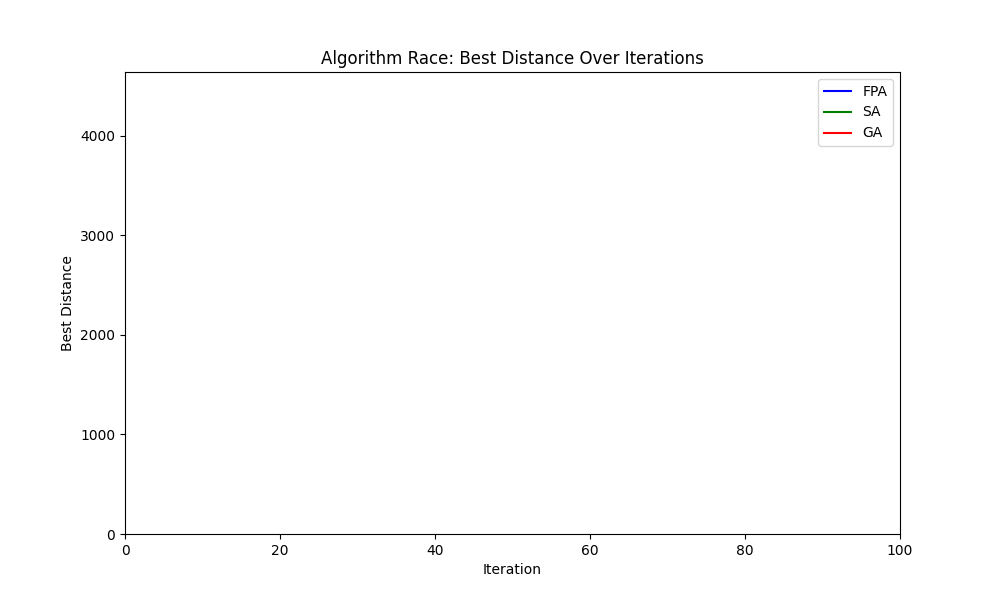

In [10]:
# Import additional libraries for animation
from matplotlib.animation import FuncAnimation
from IPython.display import Image, display

# Prepare data for animation
fpa_distances = [fpa.total_distance(perm) for perm in fpa.history]
sa_distances = [sa.total_distance(perm) for perm in sa.history]
ga_distances = [ga.total_distance(perm) for perm in ga.history]

max_iterations = max(len(fpa_distances), len(sa_distances), len(ga_distances))

# Pad shorter histories with the last value to match the longest history
fpa_distances += [fpa_distances[-1]] * (max_iterations - len(fpa_distances))
sa_distances += [sa_distances[-1]] * (max_iterations - len(sa_distances))
ga_distances += [ga_distances[-1]] * (max_iterations - len(ga_distances))

# Create the animated plot
fig, ax = plt.subplots(figsize=(10, 6))
lines = {
    "FPA": ax.plot([], [], label="FPA", color="blue")[0],
    "SA": ax.plot([], [], label="SA", color="green")[0],
    "GA": ax.plot([], [], label="GA", color="red")[0],
}
ax.set_xlim(0, max_iterations)
ax.set_ylim(0, max(max(fpa_distances), max(sa_distances), max(ga_distances)) * 1.1)
ax.set_title("Algorithm Race: Best Distance Over Iterations")
ax.set_xlabel("Iteration")
ax.set_ylabel("Best Distance")
ax.legend()

def update(frame):
    x = list(range(frame + 1))
    lines["FPA"].set_data(x, fpa_distances[:frame + 1])
    lines["SA"].set_data(x, sa_distances[:frame + 1])
    lines["GA"].set_data(x, ga_distances[:frame + 1])
    return lines.values()

ani = FuncAnimation(fig, update, frames=max_iterations, blit=True, repeat=False)

# Save the animation as a GIF
gif_path = "Best_Disatnce_over_iterations.gif"
ani.save(gif_path, writer="pillow", fps=10)

plt.close(fig)

# Display the GIF in the notebook
display(Image(filename=gif_path))

# Sensitivity Analysis

This section explores how changes in algorithm parameters affect their performance. The sensitivity analysis is performed for:
- **Flower Pollination Algorithm (FPA)**
- **Simulated Annealing (SA)**
- **Genetic Algorithm (GA)**

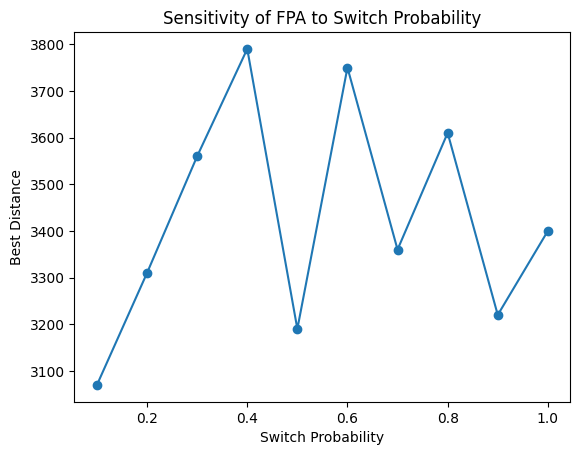

In [11]:
# Sensitivity Analysis for FPA
switch_probs = np.linspace(0.1, 1.0, 10)
gamma_values = np.linspace(0.01, 1.0, 10)
lambda_values = np.linspace(0.1, 2.0, 10)

results = []
for switch_prob in switch_probs:
    fpa = FlowerPollinationAlgorithm(city_data, switch_prob=switch_prob, gamma=0.1, lambda_=1.5)
    fpa.optimize()
    results.append({"Switch Prob": switch_prob, "Best Distance": fpa.best_distance})

# Plot sensitivity to switch probability
switch_prob_results = [r["Best Distance"] for r in results]
plt.plot(switch_probs, switch_prob_results, marker="o")
plt.title("Sensitivity of FPA to Switch Probability")
plt.xlabel("Switch Probability")
plt.ylabel("Best Distance")
plt.show()

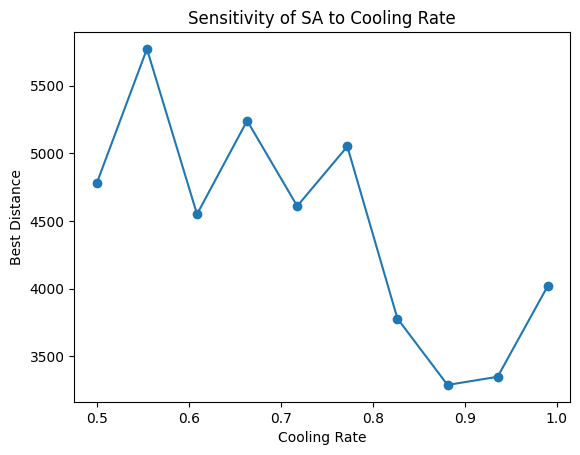

In [12]:
# Sensitivity Analysis for SA
cooling_rates = np.linspace(0.5, 0.99, 10)
results = []
for cooling_rate in cooling_rates:
    sa = SimulatedAnnealing(city_data, initial_temp=1000, cooling_rate=cooling_rate)
    sa.optimize()
    results.append({"Cooling Rate": cooling_rate, "Best Distance": sa.best_distance})

# Plot sensitivity to cooling rate
cooling_rate_results = [r["Best Distance"] for r in results]
plt.plot(cooling_rates, cooling_rate_results, marker="o")
plt.title("Sensitivity of SA to Cooling Rate")
plt.xlabel("Cooling Rate")
plt.ylabel("Best Distance")
plt.show()

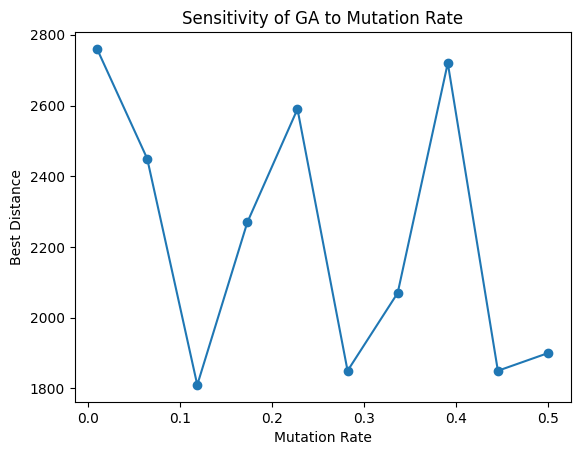

In [13]:
# Sensitivity Analysis for GA
mutation_rates = np.linspace(0.01, 0.5, 10)
results = []
for mutation_rate in mutation_rates:
    ga = GeneticAlgorithm(city_data, population_size=50, mutation_rate=mutation_rate)
    ga.optimize()
    results.append({"Mutation Rate": mutation_rate, "Best Distance": ga.best_distance})

# Plot sensitivity to mutation rate
mutation_rate_results = [r["Best Distance"] for r in results]
plt.plot(mutation_rates, mutation_rate_results, marker="o")
plt.title("Sensitivity of GA to Mutation Rate")
plt.xlabel("Mutation Rate")
plt.ylabel("Best Distance")
plt.show()

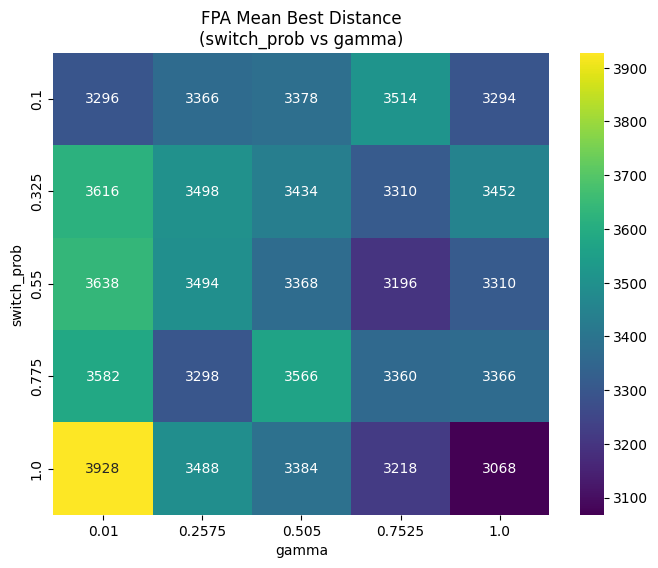

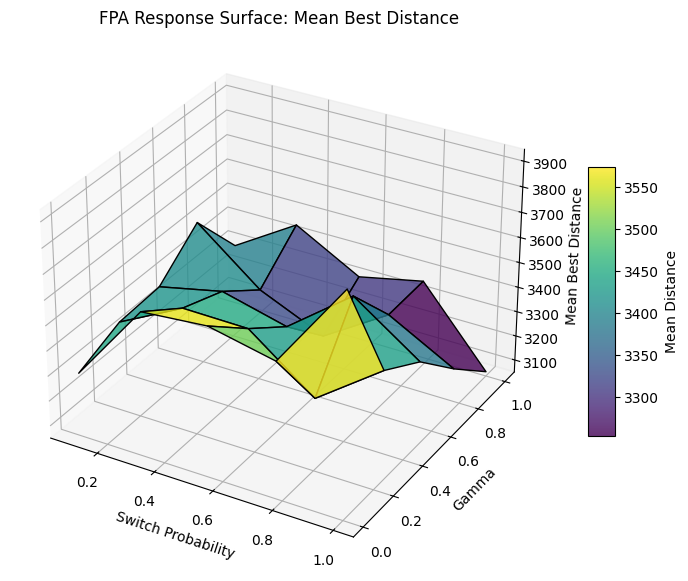

In [14]:
# Sensitivity Analysis for FPA with Grid Search
import pandas as pd

switch_probs = np.linspace(0.1, 1.0, 5)
gammas = np.linspace(0.01, 1.0, 5)
results = []

for sp in switch_probs:
    for gamma in gammas:
        distances = []
        for _ in range(5):  # Multiple runs for statistics
            fpa = FlowerPollinationAlgorithm(city_data, switch_prob=sp, gamma=gamma)
            fpa.optimize()
            distances.append(fpa.best_distance)
        results.append({
            "switch_prob": sp,
            "gamma": gamma,
            "mean_distance": np.mean(distances),
            "std_distance": np.std(distances)
        })

df = pd.DataFrame(results)
pivot = df.pivot(index="switch_prob", columns="gamma", values="mean_distance")
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="viridis")
plt.title("FPA Mean Best Distance\n(switch_prob vs gamma)")
plt.xlabel("gamma")
plt.ylabel("switch_prob")
plt.show()

# Response Surface Visualization for FPA (switch_prob vs gamma)
from mpl_toolkits.mplot3d import Axes3D

# Prepare grid data
X = df["switch_prob"].values
Y = df["gamma"].values
Z = df["mean_distance"].values

# Reshape for surface plot
X_unique = np.unique(X)
Y_unique = np.unique(Y)
X_grid, Y_grid = np.meshgrid(X_unique, Y_unique)
Z_grid = df.pivot(index="gamma", columns="switch_prob", values="mean_distance").values

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X_grid, Y_grid, Z_grid, cmap='viridis', edgecolor='k', alpha=0.8)
ax.set_xlabel('Switch Probability')
ax.set_ylabel('Gamma')
ax.set_zlabel('Mean Best Distance')
ax.set_title('FPA Response Surface: Mean Best Distance')
fig.colorbar(surf, shrink=0.5, aspect=10, label='Mean Distance')
plt.show()

# Conclusions

- **Algorithm Performance**: Among FPA, SA, and GA, the Genetic Algorithm often achieves the shortest route, but execution time and consistency may vary depending on parameter settings.
- **Parameter Sensitivity**: The response surface and sensitivity analyses show that algorithm performance is highly dependent on parameter choices. Fine-tuning is essential for optimal results.
- **Execution Time**: Real execution times differ significantly between algorithms. FPA and GA may require more computation for larger populations or generations, while SA is generally faster but may get stuck in local minima.
- **Visualization**: Animated and static visualizations provide valuable insights into the convergence and behavior of each algorithm.
- **Practical Recommendation**: For practical TSP applications, start with GA for solution quality, but consider FPA or SA for faster, approximate solutions or when computational resources are limited.
- **Future Work**: Further improvements could include hybrid algorithms, parallelization, or testing on larger datasets and real-world constraints.

C:\Users\21654\AppData\Local\Temp\ipykernel_10112\484027483.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([fpa_best_distances, sa_best_distances, ga_best_distances], labels=["FPA", "SA", "GA"])


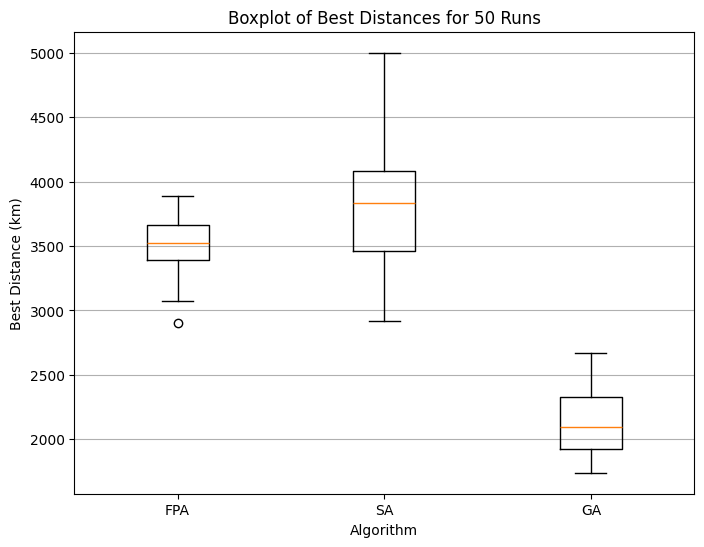

In [15]:
# Boxplot of Best Distances for the 3 Algorithms (50 runs)
import matplotlib.pyplot as plt

num_runs = 50
fpa_best_distances = []
sa_best_distances = []
ga_best_distances = []

for _ in range(num_runs):
    fpa = FlowerPollinationAlgorithm(city_data)
    fpa.optimize()
    fpa_best_distances.append(fpa.best_distance)

    sa = SimulatedAnnealing(city_data)
    sa.optimize()
    sa_best_distances.append(sa.best_distance)

    ga = GeneticAlgorithm(city_data)
    ga.optimize()
    ga_best_distances.append(ga.best_distance)

plt.figure(figsize=(8, 6))
plt.boxplot([fpa_best_distances, sa_best_distances, ga_best_distances], labels=["FPA", "SA", "GA"])
plt.title("Boxplot of Best Distances for 50 Runs")
plt.ylabel("Best Distance (km)")
plt.xlabel("Algorithm")
plt.grid(True, axis='y')
plt.show()

# Time Complexity Analysis of FPA

This plot shows how the execution time of the Flower Pollination Algorithm (FPA) increases as the number of cities grows.

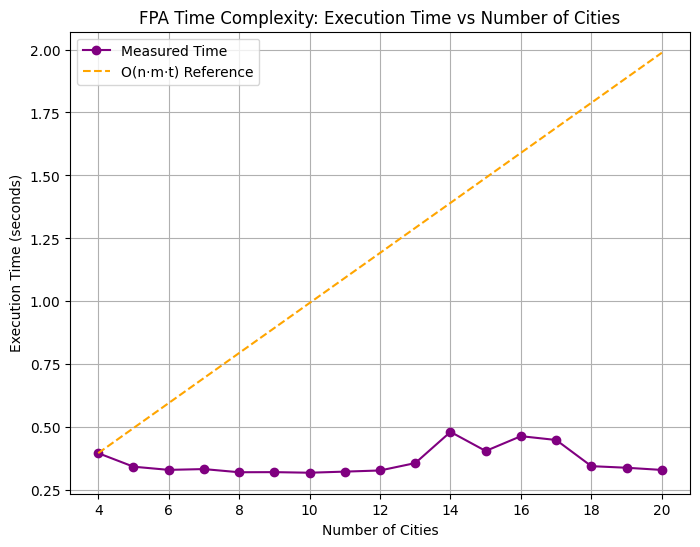

In [19]:
import time

city_sizes = list(range(4, len(city_data.cities) + 1))
fpa_times = []

for n in city_sizes:
    sub_city_data = CityData()
    sub_city_data.cities = city_data.cities[:n]
    sub_city_data.city_names = city_data.city_names[:n]
    # Recompute the distance matrix for the subset of cities
    sub_city_data.distance_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i != j:
                dx = sub_city_data.cities[i][0] - sub_city_data.cities[j][0]
                dy = sub_city_data.cities[i][1] - sub_city_data.cities[j][1]
                sub_city_data.distance_matrix[i, j] = np.sqrt(dx**2 + dy**2) * 111  # Approximate km
    fpa = FlowerPollinationAlgorithm(sub_city_data)
    start = time.time()
    fpa.optimize()
    elapsed = time.time() - start
    fpa_times.append(elapsed)

plt.figure(figsize=(8, 6))
plt.plot(city_sizes, fpa_times, marker="o", color="purple", label="Measured Time")
# Plot theoretical time complexity curve (O(n*m*t)), assuming m=population, t=iterations (use default values)
m = getattr(fpa, "population_size", 20)  # fallback to 20 if not present
t = getattr(fpa, "n_iterations", 100)    # fallback to 100 if not present
city_sizes_arr = np.array(city_sizes)
theoretical = (city_sizes_arr * m * t) / (city_sizes_arr[0] * m * t) * fpa_times[0]
plt.plot(city_sizes, theoretical, '--', color="orange", label="O(n·m·t) Reference")
plt.title("FPA Time Complexity: Execution Time vs Number of Cities")
plt.xlabel("Number of Cities")
plt.ylabel("Execution Time (seconds)")
plt.legend()
plt.grid(True)
plt.show()